# CNN with Keras

In [9]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

We need to reshape data (remember that we are using 28X28 2D images).

We can reshape to 1X28X28 or 28X28X1 (1 indicates a single color channel)

In [5]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
    input_shape = (1,28,28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
    input_shape = (28,28,1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255 #normalization
test_images /= 255

In [8]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [10]:
# visualizing data

def display_sample(num):
    print(train_labels[num])
    # label converted back to a number
    label = train_labels[num].argmax(axis = 0)
    # reshape the 768 values to a 28x28 images
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


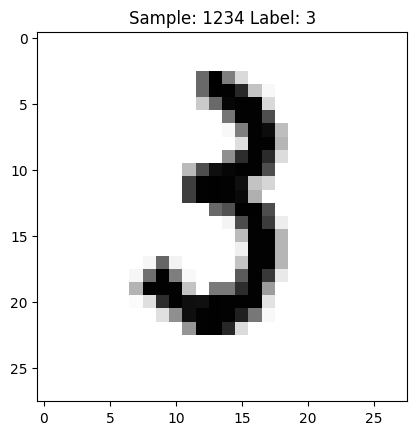

In [11]:
display_sample(1234)

CNN Model

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation = 'relu',
                 input_shape = input_shape))
#64 3x3 kernels
model.add(Conv2D(64,(3,3),activation='relu'))
# reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into ou final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# another dropout
model.add(Dropout(0.5))
# final categorization for 0-9 with softmax
model.add(Dense(10, activation='softmax'))

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(train_images,train_labels,
                    batch_size = 32,
                    epochs = 2, # on course it was 10 but it takes too long
                    verbose = 2,
                    validation_data = (test_images,test_labels))

Epoch 1/2
1875/1875 - 105s - 56ms/step - accuracy: 0.9766 - loss: 0.0773 - val_accuracy: 0.9864 - val_loss: 0.0392
Epoch 2/2
1875/1875 - 100s - 53ms/step - accuracy: 0.9819 - loss: 0.0610 - val_accuracy: 0.9914 - val_loss: 0.0268


In [19]:
score = model.evaluate(test_images,test_labels, verbose=0)
print("Test loss: ", score[0])
print('Test accuracy: ',score[1])

Test loss:  0.02680307626724243
Test accuracy:  0.9914000034332275
